# House Sales in King County, USA - Price Prediction
&nbsp;

1. Data Cleaning
2. EDA & Data Visualization
3. Model Building

## Overview

### 1. [Importing Libraries](#1)
### 2. [Data Cleaning](#2) 
### 3. [Visualization and EDA](#3) 
### 4. [Model Building](#4)
### 5. [Summary](#5)


# **Importing** <a id="1"></a>

In [127]:
# Standard data analysis and wrangling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Various ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Maps for Visualization
import folium

# Formatting
pd.set_option('display.max_columns', None) # Show all column names. For example when running the df.head() method. 

# Warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

#Saving Ai Models
import pickle as pk

In [128]:
# Import data

df = pd.read_csv('kc_house_data.csv')

In [129]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209T000000,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225T000000,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209T000000,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218T000000,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


Initial thoughts on the data

- Date should be converted to datetime format
- Eliminate 'T000000' from every row in the date column
- Convert price column to integers
- What's the difference between sqft_living/sqft_lot and sqft_living15/sqft_lot15? (Screenshot below explains this)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **Data Cleaning** <a id="2"></a>

Based on the above cell, it appears that there is no missing data. There are 21613 rows in the dataset.

Prepare data for EDA:

- convert each column to the correct format
- search for and remove outliers

### Date - Column

- Remove the 'T000000' from the date column and convert to datetime format.

In [131]:
# Change date to datetime format

clean_date = df.date.apply(lambda x: x.split('T')[0])
clean_date

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [132]:
# Replace date column with the 'clean_date' variable

df['date'] = clean_date
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0000,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209,538000.0000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225,180000.0000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209,604000.0000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218,510000.0000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [133]:
# Convert date column to Pandas datetime format

df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')

df.head()

ValueError: time data "20141013" doesn't match format "%Y/%m/%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### Price column - convert to integers

- Prices should be integers, not floats. Pennies are irreleveant when dealing with high prices. 

In [134]:
df.price = df.price.astype(np.int64)

In [135]:
# Confirm price column was converted to type int

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [136]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209,538000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225,180000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209,604000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218,510000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


## Check for outliers

- Create simple scatterplots and remove outliers. 

In [137]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [138]:
# Select columns to plot

cols_to_plot = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for Price: Total = 4028


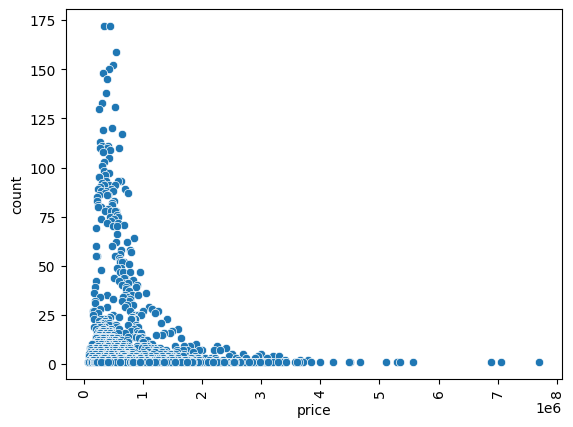

Graph for Bedrooms: Total = 13


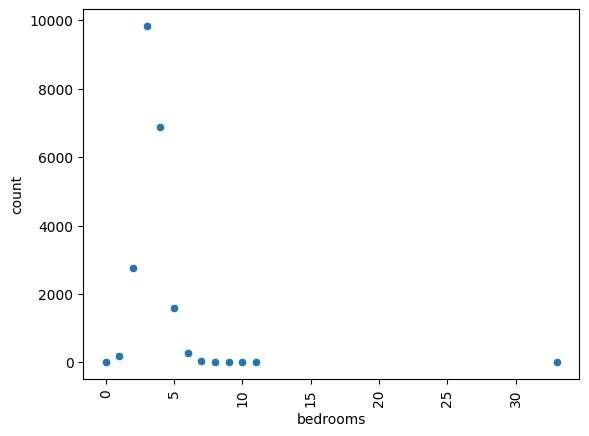

Graph for Bathrooms: Total = 30


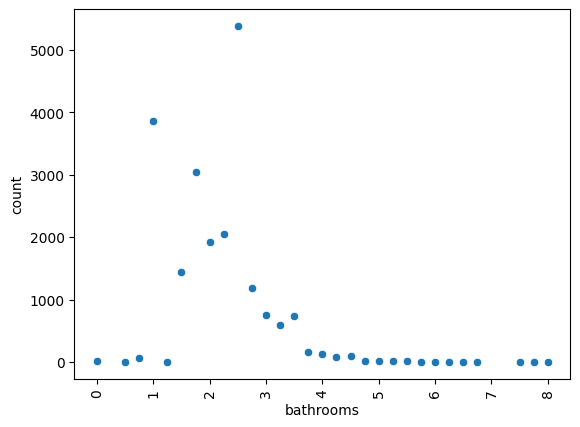

Graph for Sqft_living: Total = 1038


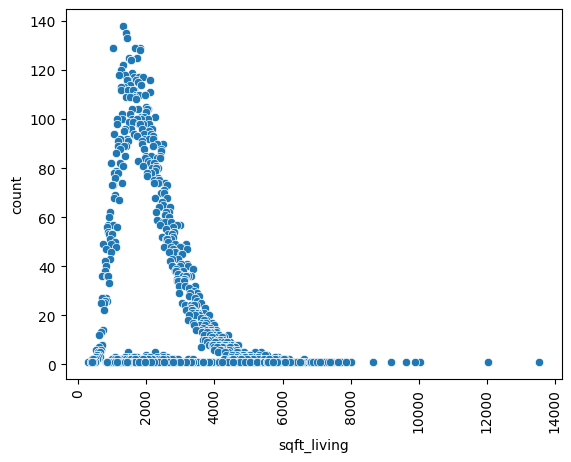

Graph for Sqft_lot: Total = 9782


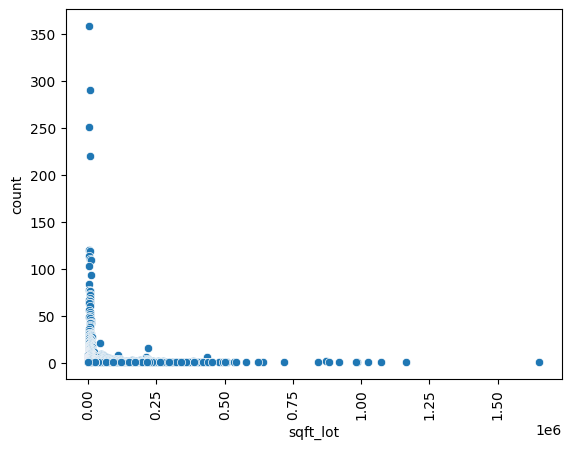

Graph for Floors: Total = 6


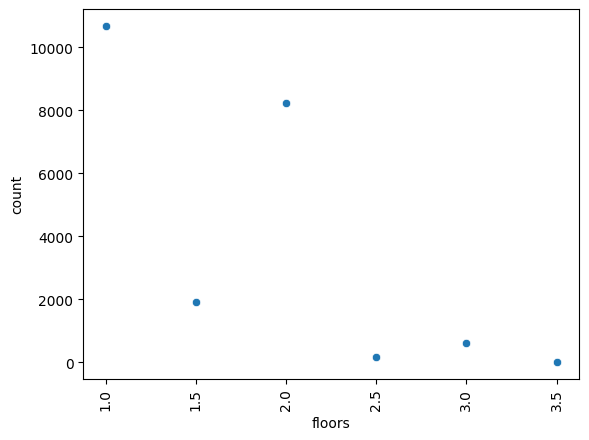

Graph for Waterfront: Total = 2


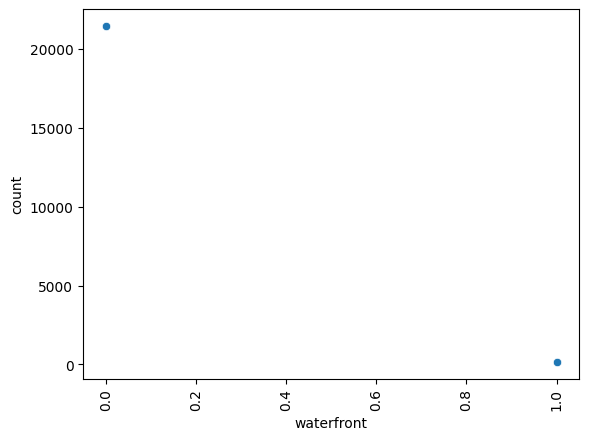

Graph for View: Total = 5


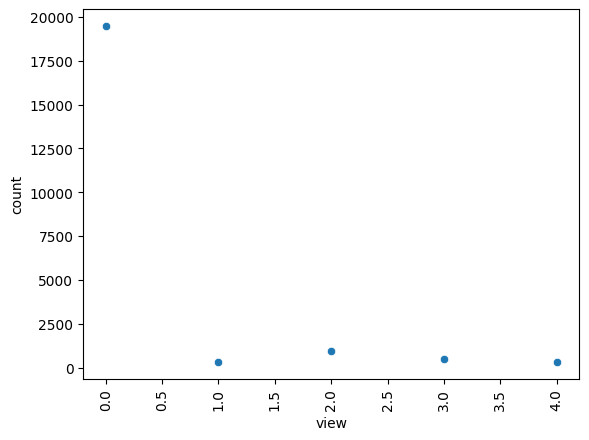

Graph for Condition: Total = 5


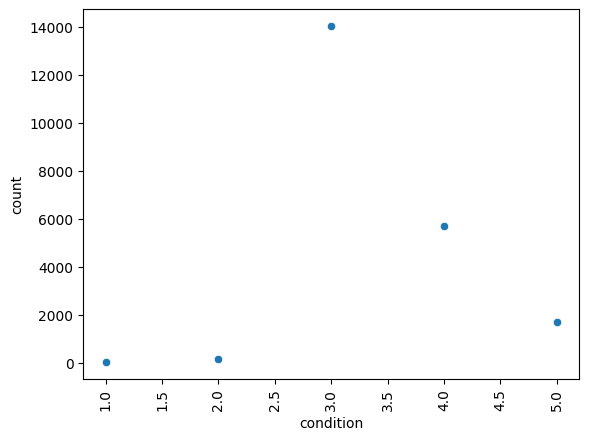

Graph for Grade: Total = 12


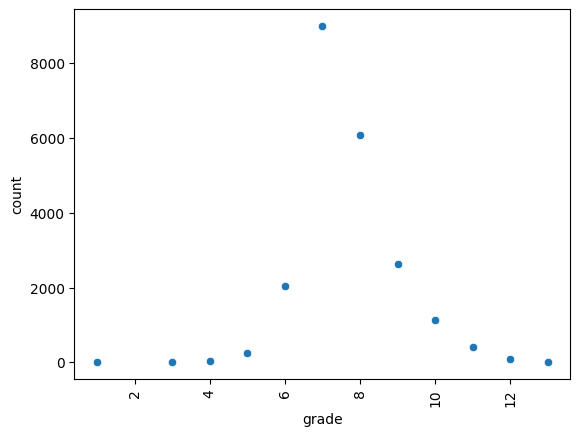

Graph for Sqft_above: Total = 946


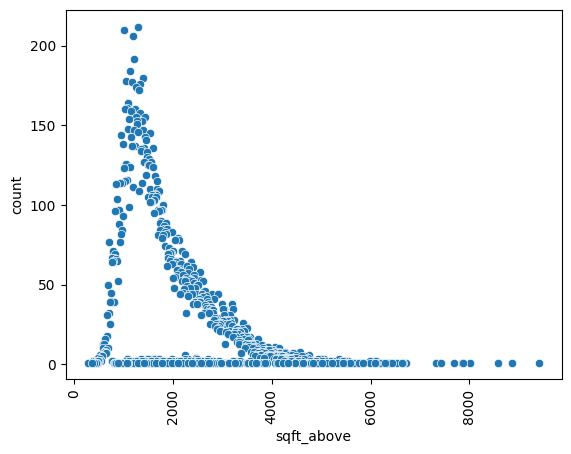

Graph for Sqft_basement: Total = 306


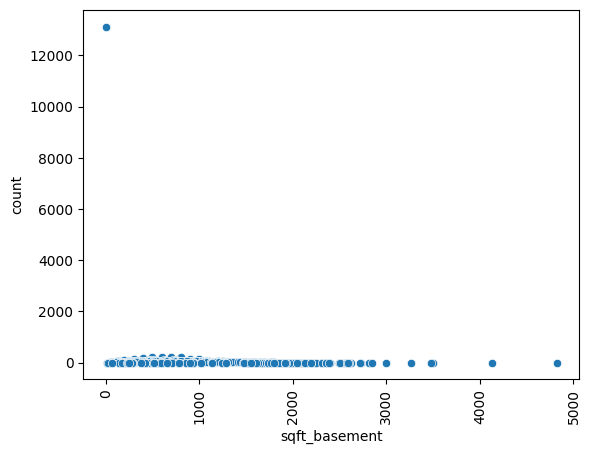

Graph for Yr_built: Total = 116


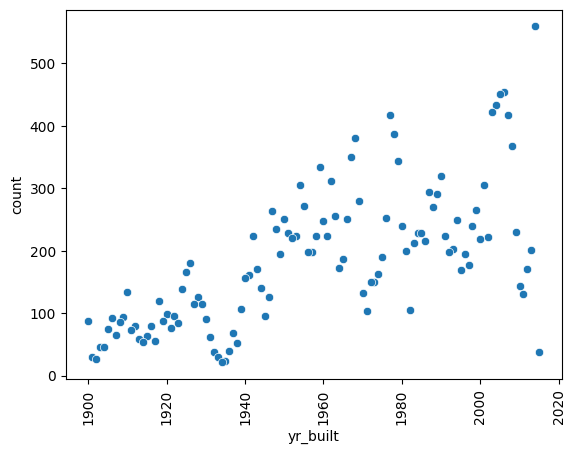

Graph for Yr_renovated: Total = 70


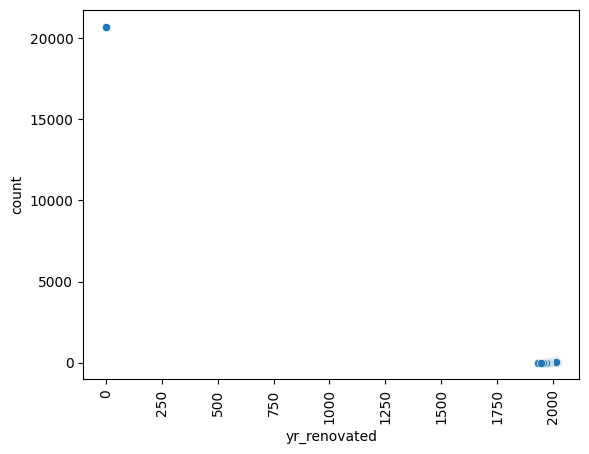

Graph for Zipcode: Total = 70


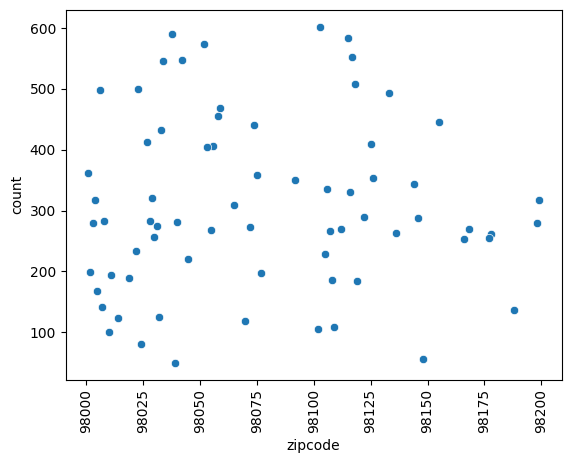

Graph for Lat: Total = 5034


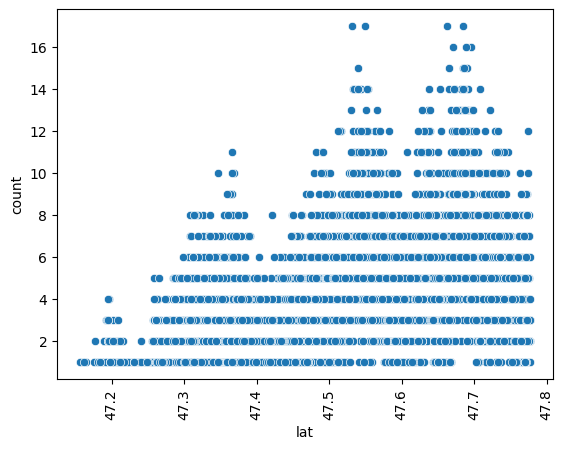

Graph for Long: Total = 752


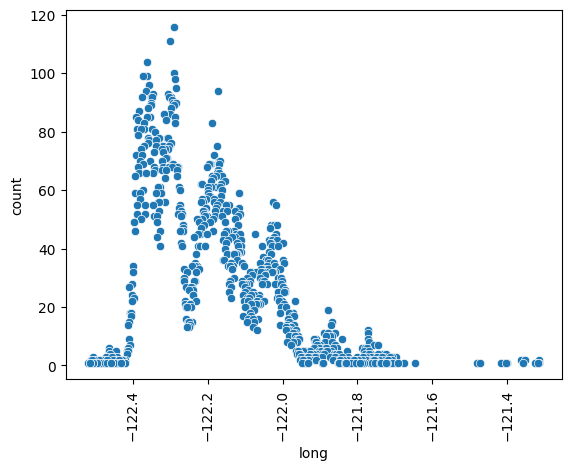

Graph for Sqft_living15: Total = 777


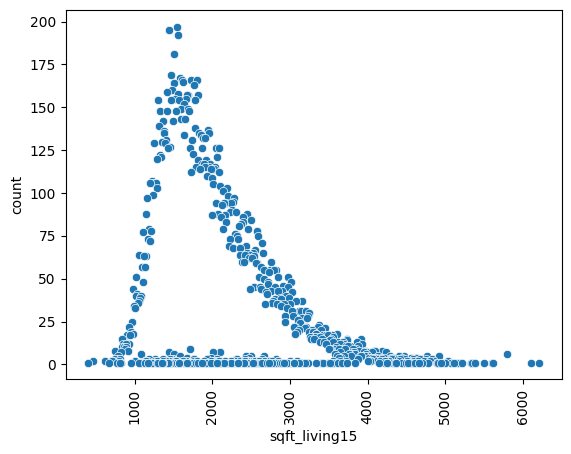

Graph for Sqft_lot15: Total = 8689


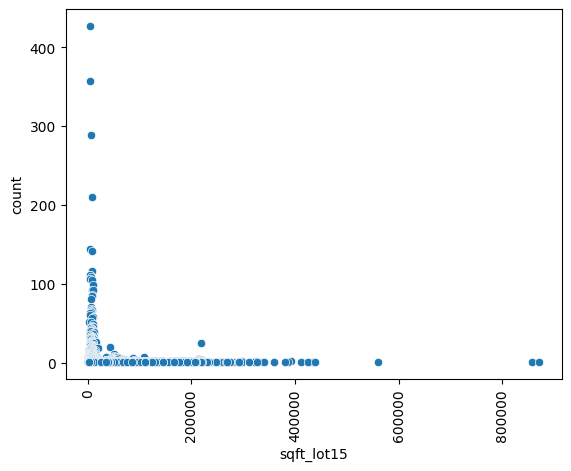

In [139]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

Initial thoughts on graphs above. 

1. Price - Remove houses over 6mil - possibly even houses over 4mil?
2. Bedrooms - Remove over 30 bedrooms?
3. Bathroom - 0? Look into this. How can a house not have any bathrooms? 
4. Sqft_living - Possily remove houses that are over 12,000sqft?
5. sqft_lot - Remove anything over 750,000sqft?
6. sqft_above - Possibly remove listings that are over 8000sqft? Maybe even over 6500sqft - depending on the number of listings.
7. sqft_basement - Drop listings that are over 3000sqft?
8. sqft_lot15 - Drop listings that are over 500,000sqft?

### Price - outliers

In [140]:
# Over 6mil - Only 3 listings, let's see how many houses cost more than 4mil.

df.loc[df.price > 6000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611,7062500,5,4.5000,10040,37325,2.0000,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.2140,3930,25449
7252,6762700020,20141013,7700000,6,8.0000,12050,27600,2.5000,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.3230,3940,8800
9254,9208900037,20140919,6885000,6,7.7500,9890,31374,2.0000,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.2400,4540,42730


In [141]:
# Only 11 homes over $4mil.
# I think we can safely drop these. 

print(len(df.loc[df.price > 4000000]))
df.loc[df.price > 4000000]

11


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020,5110800,5,5.2500,8010,45517,2.0000,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.2110,3430,26788
1315,7558700030,20150413,5300000,6,6.0000,7390,24829,2.0000,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.2100,4320,24619
1448,8907500070,20150413,5350000,5,5.0000,8000,23985,2.0000,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.2200,4600,21750
2626,7738500731,20140815,4500000,5,5.5000,6640,40014,2.0000,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.2800,3030,23408
3914,9808700762,20140611,7062500,5,4.5000,10040,37325,2.0000,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.2140,3930,25449
4411,2470100110,20140804,5570000,5,5.7500,9200,35069,2.0000,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.2330,3560,24345
7252,6762700020,20141013,7700000,6,8.0000,12050,27600,2.5000,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.3230,3940,8800
8092,1924059029,20140617,4668000,5,6.7500,9640,13068,1.0000,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.2100,3270,10454
8638,3835500195,20140618,4489000,4,3.0000,6430,27517,2.0000,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.2190,3720,14592
9254,9208900037,20140919,6885000,6,7.7500,9890,31374,2.0000,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.2400,4540,42730


In [142]:
# Drop homes over $4mil

df = df[df.price < 4000000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209,538000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225,180000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209,604000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218,510000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509
21609,6600060120,20150223,400000,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200
21610,1523300141,20140623,402101,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007
21611,291310100,20150116,400000,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287


### Bedrooms - outliers

In [143]:
# 11 and 33 bedroom homes are clearly anomalies as they only have 1 listing each. 10 bedroom homes are also very rare with 3 listings. 
# I'll remove all homes with 10, 11, and 33 bedrooms. 

df.bedrooms.value_counts()

bedrooms
3     9824
4     6880
2     2760
5     1594
6      269
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [144]:
# Drop 10, 11, and 33 bedroom homes

df = df[df.bedrooms < 10]

In [145]:
# Let's examine homes with 0 bedrooms.

# A house with 0 bedrooms doesn't make sense to me. There are houses with 0 bedrooms and 0 bathrooms but have huge lots? 
# Are these possibly offices? Was the data not entered correctly?
# I'm going to drop all of these rows because I think we'll come up with more accurate models this way. 

df[df.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612,1095000,0,0.0000,3064,4764,3.5000,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.3220,2360,4000
3119,3918400017,20150205,380000,0,0.0000,1470,979,3.0000,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.3560,1470,1399
3467,1453602309,20140805,288000,0,1.5000,1430,1650,3.0000,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.2900,1430,1650
4868,6896300380,20141002,228000,0,1.0000,390,5900,1.0000,0,0,2,4,390,0,1953,0,98118,47.5260,-122.2610,2170,6000
6994,2954400190,20140624,1295650,0,0.0000,4810,28008,2.0000,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.0690,4740,35061
8477,2569500210,20141117,339950,0,2.5000,2290,8319,2.0000,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.1510,2500,8751
8484,2310060040,20140925,240000,0,2.5000,1810,5669,2.0000,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.0530,1810,5685
9773,3374500520,20150429,355000,0,0.0000,2460,8049,2.0000,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.1680,2520,8050
9854,7849202190,20141223,235000,0,0.0000,1470,4800,2.0000,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.8280,1060,7200
12653,7849202299,20150218,320000,0,2.5000,1490,7111,2.0000,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.8260,1500,4675


In [146]:
# Drop houses with 0 bedrooms

df = df[df.bedrooms > 0]

### Bathrooms - outliers

In [147]:
df.bathrooms.value_counts()

bathrooms
2.5000    5377
1.0000    3851
1.7500    3047
2.2500    2047
2.0000    1929
1.5000    1445
2.7500    1185
3.0000     750
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000      99
4.2500      79
0.7500      71
4.7500      23
5.0000      20
5.2500      11
1.2500       9
5.5000       8
0.5000       4
6.0000       4
0.0000       3
5.7500       3
6.2500       2
6.5000       2
6.7500       1
7.5000       1
8.0000       1
Name: count, dtype: int64

In [148]:
# A house with no bathrooms? Again, is this possibly some sort of store/office? Still seems strange if that's the case. 
# I'm going to drop the 3 rows.

df[df.bathrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217,75000,1,0.0000,670,43377,1.0000,0,0,3,3,670,0,1966,0,98022,47.2638,-121.9060,1160,42882
5832,5702500050,20141104,280000,1,0.0000,600,24501,1.0000,0,0,2,3,600,0,1950,0,98045,47.5316,-121.7490,990,22549
10481,203100435,20140918,484000,1,0.0000,690,23244,1.0000,0,0,4,7,690,0,1948,0,98053,47.6429,-121.9550,1690,19290


In [151]:
df = df[df.bathrooms > 0]

In [152]:
df.bathrooms.value_counts()

bathrooms
2.5000    5377
1.0000    3851
1.7500    3047
2.2500    2047
2.0000    1929
1.5000    1445
2.7500    1185
3.0000     750
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000      99
4.2500      79
0.7500      71
4.7500      23
5.0000      20
5.2500      11
1.2500       9
5.5000       8
0.5000       4
6.0000       4
5.7500       3
6.2500       2
6.5000       2
6.7500       1
7.5000       1
8.0000       1
Name: count, dtype: int64

In [153]:
# I'm going to drop houses that have between 1-3 value counts (number of bathrooms from above) as I think this will lead to more accurate results.

df = df[df.bathrooms != 6.75]
df = df[df.bathrooms != 7.50]
df = df[df.bathrooms != 8.00]
df = df[df.bathrooms != 6.50]
df = df[df.bathrooms != 6.25]

In [154]:
# Looks better now.  

df.bathrooms.value_counts()

bathrooms
2.5000    5377
1.0000    3851
1.7500    3047
2.2500    2047
2.0000    1929
1.5000    1445
2.7500    1185
3.0000     750
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000      99
4.2500      79
0.7500      71
4.7500      23
5.0000      20
5.2500      11
1.2500       9
5.5000       8
0.5000       4
6.0000       4
5.7500       3
Name: count, dtype: int64

### Sqft_living - outliers

In [158]:
# These rows were dropped in one of the previous steps while removing outliers. 

df[df.sqft_living > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### Sqft lot - outliers

In [159]:
df.sqft_lot.value_counts()

sqft_lot
5000      358
6000      289
4000      251
7200      220
4800      119
         ... 
3320        1
7042        1
263538      1
22605       1
1076        1
Name: count, Length: 9760, dtype: int64

In [160]:
print(len(df[df.sqft_lot > 750000]))
df[df.sqft_lot > 750000]

11


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327,700000,4,1.0000,1300,1651359,1.0000,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.0230,2560,425581
3949,722069232,20140905,998000,4,3.2500,3770,982998,2.0000,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.0870,2290,37141
4441,3626079040,20140730,790000,2,3.0000,2560,982278,1.0000,0,0,3,8,2560,0,2004,0,98014,47.6955,-121.8610,1620,40946
4540,2522029039,20140929,550000,3,2.0000,3650,843309,2.0000,0,0,4,7,3650,0,1991,0,98070,47.3627,-122.4960,1870,273992
6691,2624089007,20150320,1998000,2,2.5000,3900,920423,2.0000,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.7560,2720,411962
7077,2724079090,20150105,1650000,4,3.2500,3920,881654,3.0000,0,3,3,11,3920,0,2002,0,98024,47.5385,-121.8960,2970,112384
7647,2623069031,20140521,542500,5,3.2500,3010,1074218,1.5000,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.0040,2450,68825
7769,2323089009,20150119,855000,4,3.5000,4030,1024068,2.0000,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.7440,1830,11700
9714,225079036,20150107,937500,4,4.0000,5545,871200,2.0000,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.8820,3420,871200
17319,3326079016,20150504,190000,2,1.0000,710,1164794,1.0000,0,0,2,5,710,0,1915,0,98014,47.6888,-121.9090,1680,16730


In [161]:
# Let's drop the 11 rows of homes that have a lot of over 7500000 as they seem like outliers.

df = df[df.sqft_lot < 750000]

### Sqft above - outliers

- Maybe remove listings that are over 8000sqft? Possibly even over 6500 - depending on the number of listings.

In [162]:
# Seems like these were already dropped, let's check over 6500 sqft. 

df[df['sqft_above'] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [163]:
# Only 6 entries. Let's drop these too. 

df[df.sqft_above > 6500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11105,4054530260,20140627,1820000,4,4.5000,6640,53330,2.0000,0,0,3,12,6640,0,1993,0,98077,47.7283,-122.0460,4620,68625
11871,8835800350,20150112,1950000,4,3.2500,7420,167869,2.0000,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.7640,5610,169549
13411,2426039123,20150130,2415000,5,4.7500,7880,24250,2.0000,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.3620,2740,10761
16773,1630700380,20150130,1920000,5,5.7500,7730,230868,2.0000,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.0840,2660,39292
18594,3023069166,20140708,1135250,5,4.0000,7320,217800,2.0000,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.0860,3270,34500
19858,2524069078,20150122,2700000,4,4.0000,7850,89651,2.0000,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.9820,6210,95832


In [164]:
df = df[df.sqft_above < 6500]

### Sqft basement - outliers

sqft_basement - Drop listings that are over 3000sqft?

In [165]:
df[df.sqft_basement > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10085,7767000060,20140912,1900000,5,4.2500,6510,16471,2.0000,0,3,4,11,3250,3260,1980,0,98040,47.5758,-122.2420,4480,16471
15482,624069108,20140812,3200000,4,3.2500,7000,28206,1.0000,1,4,4,12,3500,3500,1991,0,98075,47.5928,-122.0860,4913,14663


In [166]:
# Let's drop the 2 outliers

df = df[df.sqft_basement < 3000]

### Sqft lot15 - outliers

sqft_lot15 - Drop listings that are over 500,000 sqft?

In [167]:
df[df.sqft_lot15 > 500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13464,3420069060,20141107,790000,3,2.5000,2640,432036,1.5000,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.0360,1500,560617


In [168]:
# Drop the 1 row

df = df[df.sqft_lot15 < 500000]

## Ensure all outliers have been dropped

Graph for Price: Total = 4004


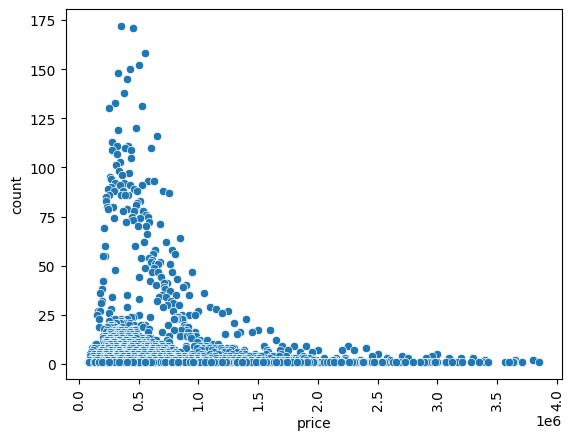

Graph for Bedrooms: Total = 9


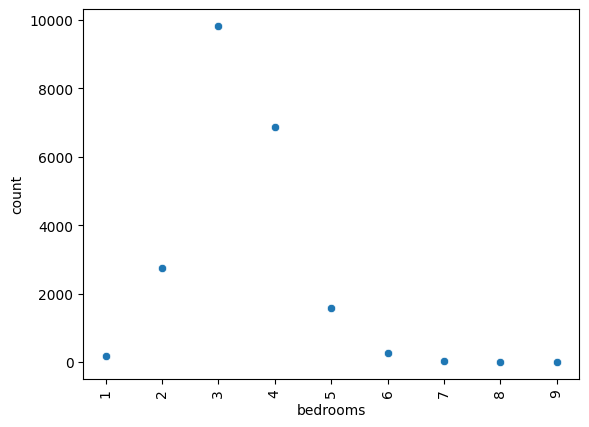

Graph for Bathrooms: Total = 23


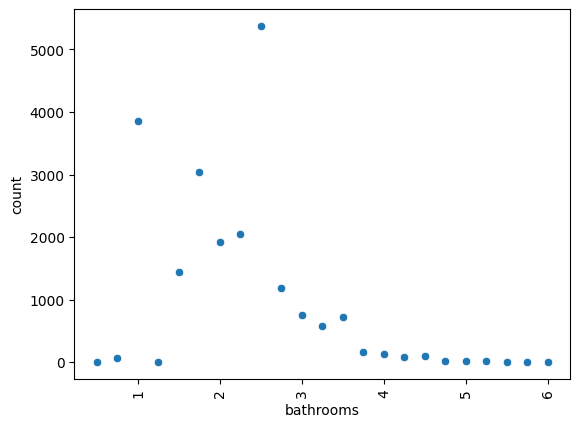

Graph for Sqft_living: Total = 1007


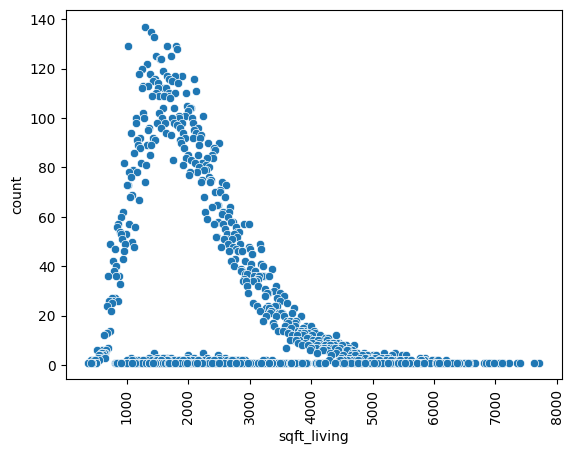

Graph for Sqft_lot: Total = 9743


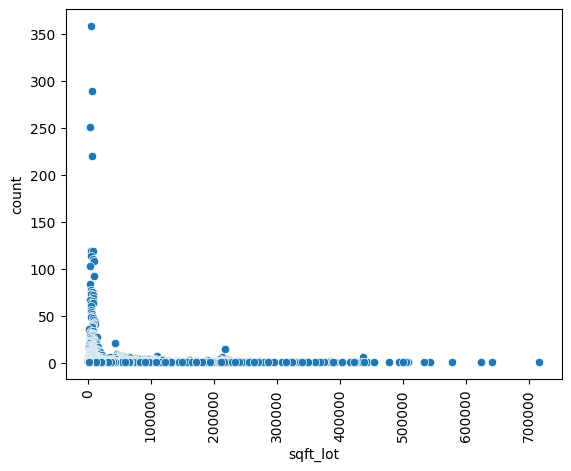

Graph for Floors: Total = 6


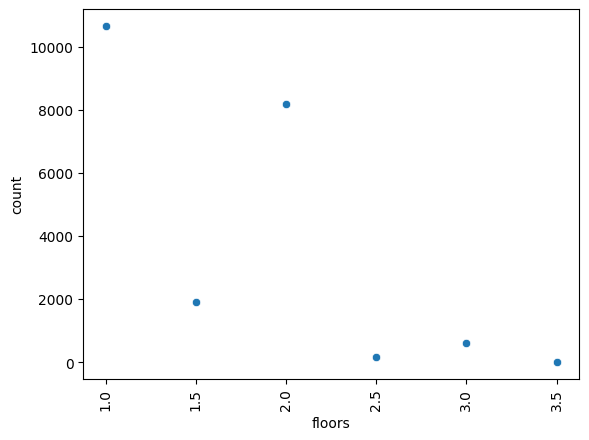

Graph for Waterfront: Total = 2


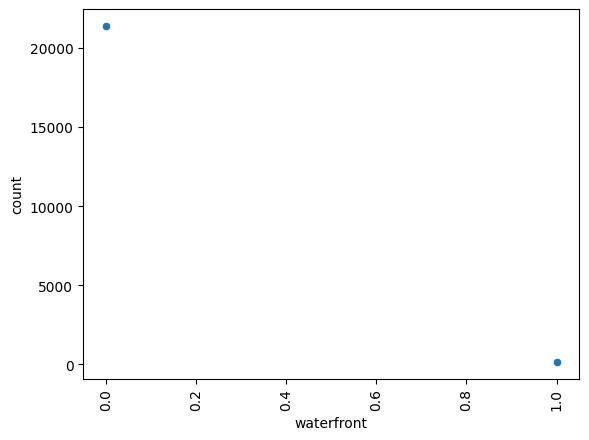

Graph for View: Total = 5


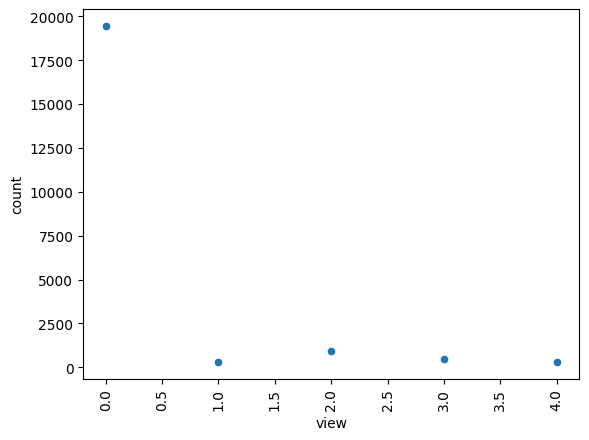

Graph for Condition: Total = 5


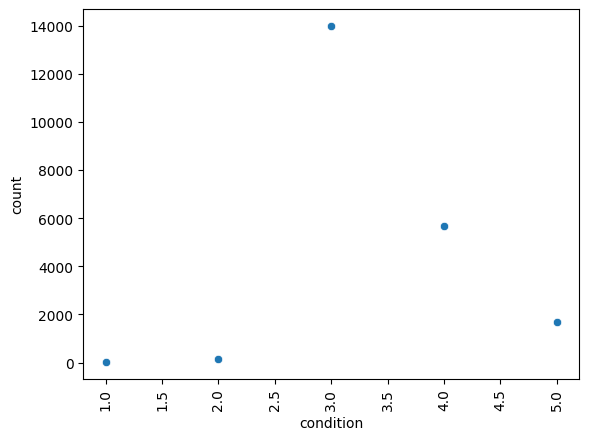

Graph for Grade: Total = 11


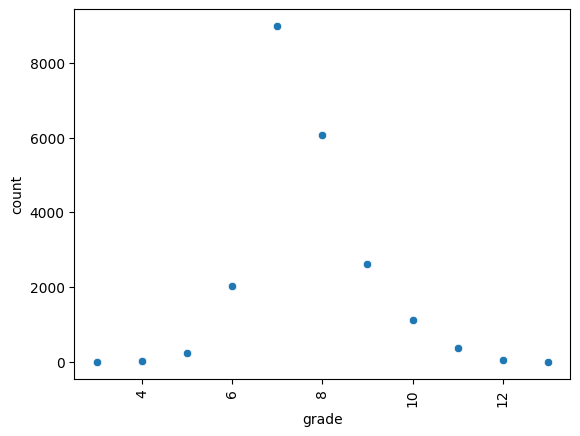

Graph for Sqft_above: Total = 921


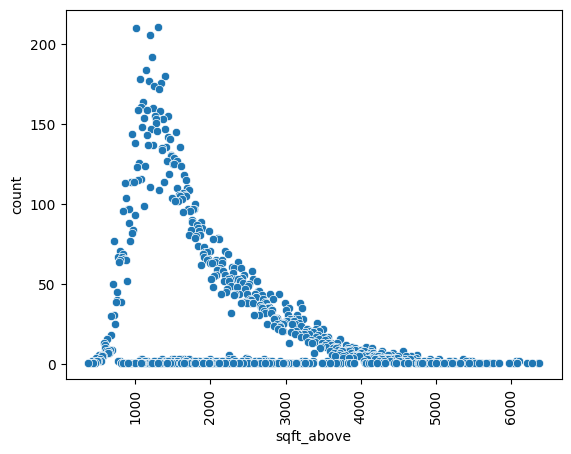

Graph for Sqft_basement: Total = 297


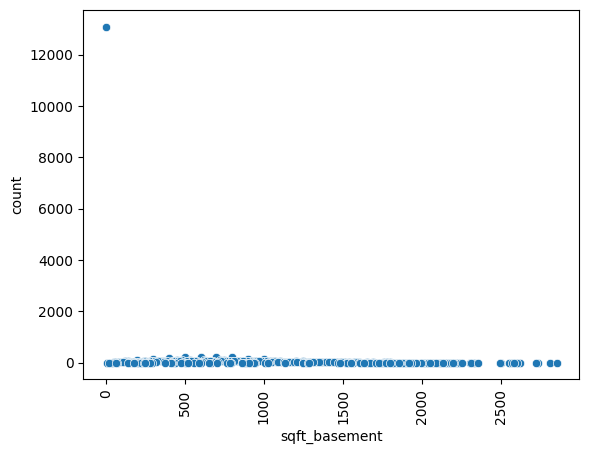

Graph for Yr_built: Total = 116


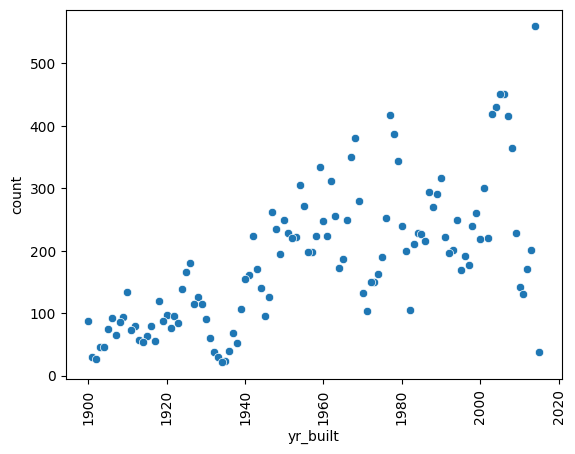

Graph for Yr_renovated: Total = 70


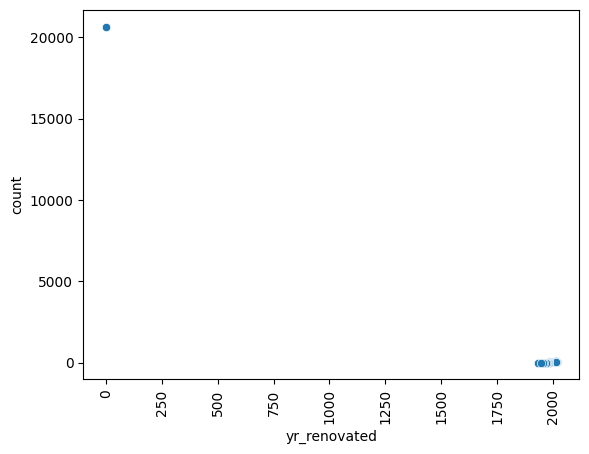

Graph for Zipcode: Total = 70


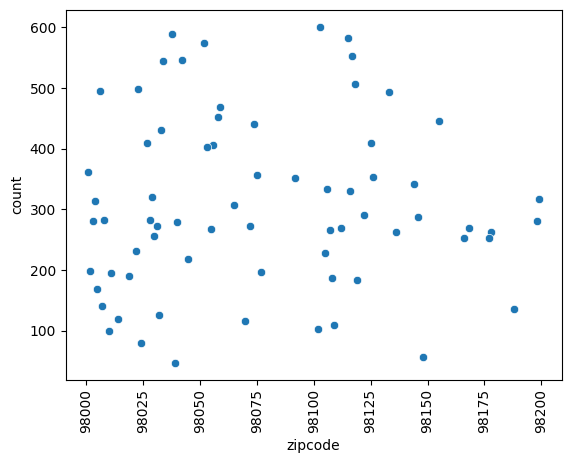

Graph for Lat: Total = 5030


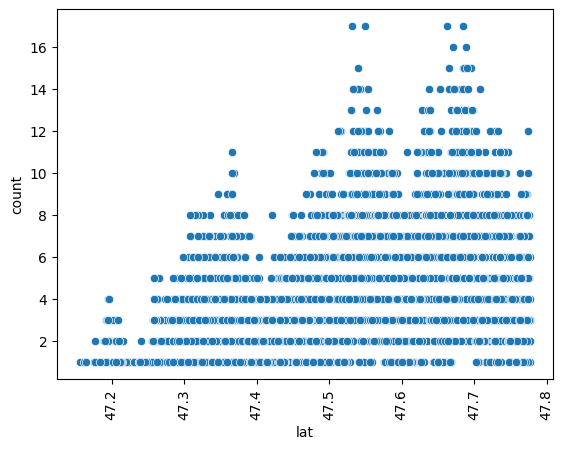

Graph for Long: Total = 750


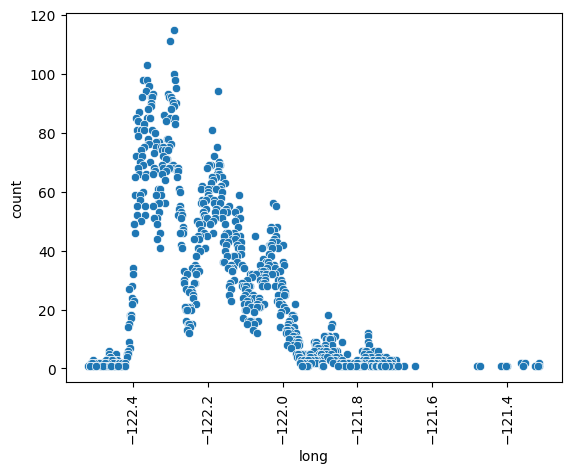

Graph for Sqft_living15: Total = 772


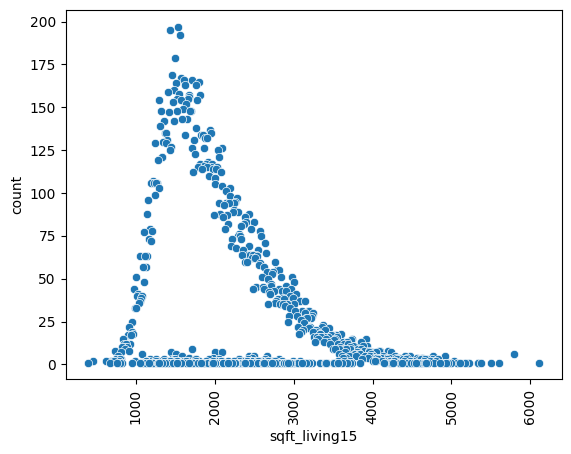

Graph for Sqft_lot15: Total = 8657


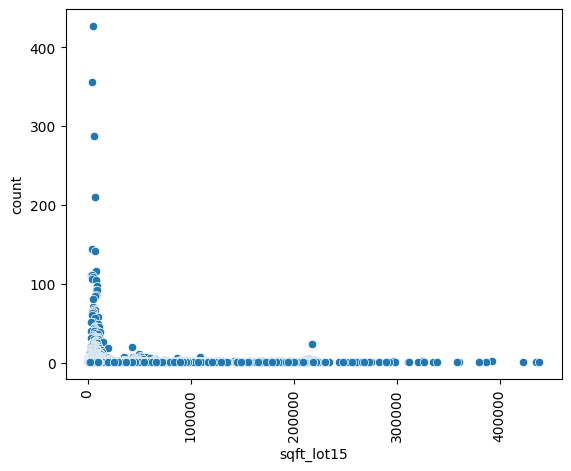

In [169]:
cols_to_plot = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]


plot_scatterplots()

&nbsp;

Looks better now with the clearest outliers removed. 

I believe that more outliers exist within the dataset, however removing too many rows could lead to having a model that overfits the data.

Move on to Visualization and EDA.

&nbsp;

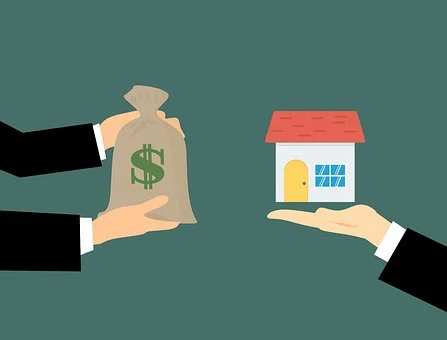

&nbsp;

# **Visualization and EDA** <a id="3"></a>

&nbsp;

In [170]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209,538000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225,180000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209,604000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218,510000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


In [171]:
df.shape

(21553, 21)

In [172]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000,21553.0000
mean,4581915817.5138,536190.9255,3.3682,2.1109,2071.9137,14504.2145,1.4933,0.0073,0.2318,3.4102,7.6520,1781.9562,289.9575,1970.9745,84.1733,98077.9977,47.5601,-122.2142,1984.2657,12559.5268
std,2876505901.8111,344823.6826,0.8966,0.7572,891.0055,33989.3149,0.5396,0.0850,0.7614,0.6507,1.1630,809.0940,437.3600,29.3668,401.1558,53.5131,0.1386,0.1406,681.6312,25317.2034
min,1000102.0000,78000.0000,1.0000,0.5000,370.0000,520.0000,1.0000,0.0000,0.0000,1.0000,3.0000,370.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000
25%,2123049420.0000,321027.0000,3.0000,1.7500,1420.0000,5040.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1190.0000,0.0000,1951.0000,0.0000,98033.0000,47.4710,-122.3280,1490.0000,5100.0000
50%,3904950190.0000,450000.0000,3.0000,2.2500,1910.0000,7609.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1975.0000,0.0000,98065.0000,47.5718,-122.2310,1840.0000,7620.0000
75%,7309100270.0000,642000.0000,4.0000,2.5000,2550.0000,10639.0000,2.0000,0.0000,0.0000,4.0000,8.0000,2210.0000,560.0000,1997.0000,0.0000,98118.0000,47.6781,-122.1250,2360.0000,10071.0000
max,9900000190.0000,3850000.0000,9.0000,6.0000,7710.0000,715690.0000,3.5000,1.0000,4.0000,5.0000,13.0000,6380.0000,2850.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6110.0000,438213.0000


Brief inferences from the data:

- The average house from the dataset has at least 3 bedrooms and 2 bathrooms
- Average size is about 2100 sqft. 
- Very few waterfront properties
- The average house was built in 1970

### House Price Distribution

C:\Users\Yahya Darwish\AppData\Local\Temp\ipykernel_16836\3094705300.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


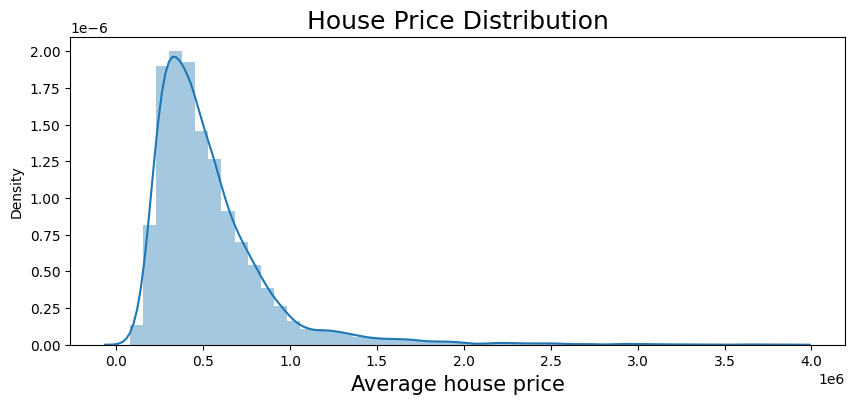

In [173]:
plt.figure(figsize=(10,4))
plt.title("House Price Distribution", size=18)
sns.distplot(df["price"])

plt.xlabel('Average house price', size=15)
plt.show()

- The prices are  slightly skewed to the right.
- May need to normalize the data.

### House Prices and Waterfront Property

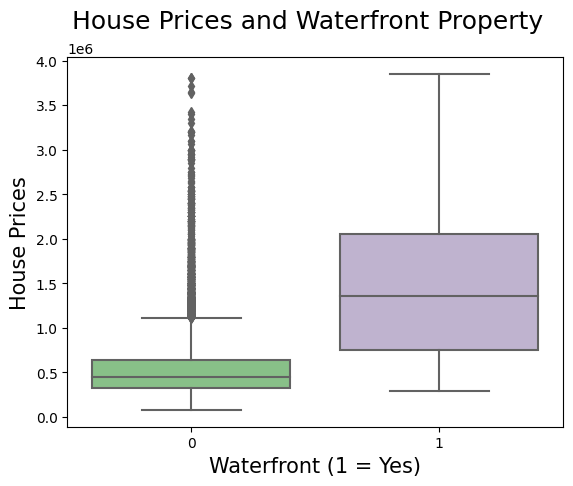

In [174]:
sns.boxplot(x = df['waterfront'], y=df['price'], palette="Accent")
plt.suptitle('House Prices and Waterfront Property', size=18)
plt.xlabel('Waterfront (1 = Yes)', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

- Waterfront properties are all  distributed within a specific range, without outliers.
- Non-waterfront properties vary widely in price and thus have a large number of outliers.
- As expected, waterfront properties are on average more expensive than regular homes - the mean price is $1,000,000 greater.

### House Prices and Number of Floors

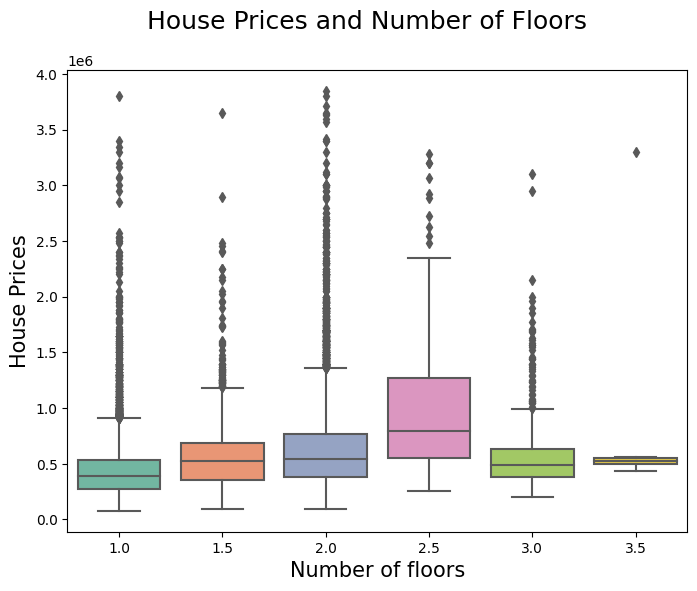

In [175]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['floors'], y=df['price'], palette="Set2")
plt.suptitle('House Prices and Number of Floors', size=18)
plt.xlabel('Number of floors', fontsize = 15)
plt.ylabel('House Prices', fontsize =15)

plt.show()

- Lots of outliers for houses that have between 1-3 floors.
- Houses with 3.5 floors seem to have the smallest price fluctuations, although there are only 7 such properties in the dataset - insuficient for any accurate deduction. 
- There seems to be an uptrend in price as the number of floors increases, though decreases at 3 and 3.5 floors - I wonder why that is. Are houses that have 3 and 3.5 floors older? Let's run a comparison.

In [176]:
df.floors.value_counts()

floors
1.0000    10666
2.0000     8203
1.5000     1908
3.0000      609
2.5000      160
3.5000        7
Name: count, dtype: int64

In [177]:
# Create a pivot table with floors/yr_built 

pd.pivot_table(df, index='floors', values = 'yr_built').astype(int)

,yr_built
floors,
1.0000,1960
1.5000,1935
2.0000,1990
2.5000,1961
3.0000,2004
3.5000,1990


My hopothesis was incorrect. In a way, it's actually the opposite of what I predicted. Houses with 3 floors are on average newer compared to homes with any other number of floors. Let's explore other features. 

### House Prices and Number of Bathrooms

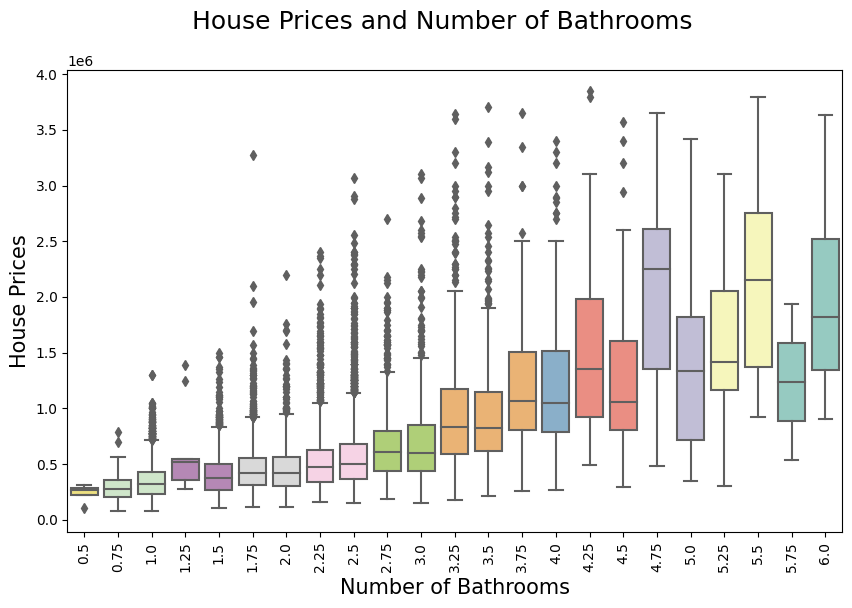

In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['bathrooms'], y=df['price'], palette="Set3_r")
plt.suptitle('House Prices and Number of Bathrooms', size=18)
plt.xlabel('Number of Bathrooms', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)
plt.xticks(rotation=90)

plt.show()

- There seems to be a general uptrend/linear relationship in price with the increase in the number of bathrooms
- Lots of outliers exist in the data
- As the number approaches 5 bathrooms the price begins to fluctuate significantly. This is mainly due to having a limited number of houses that have that many bathrooms within the dataset. 

### House Prices and Grade Rating

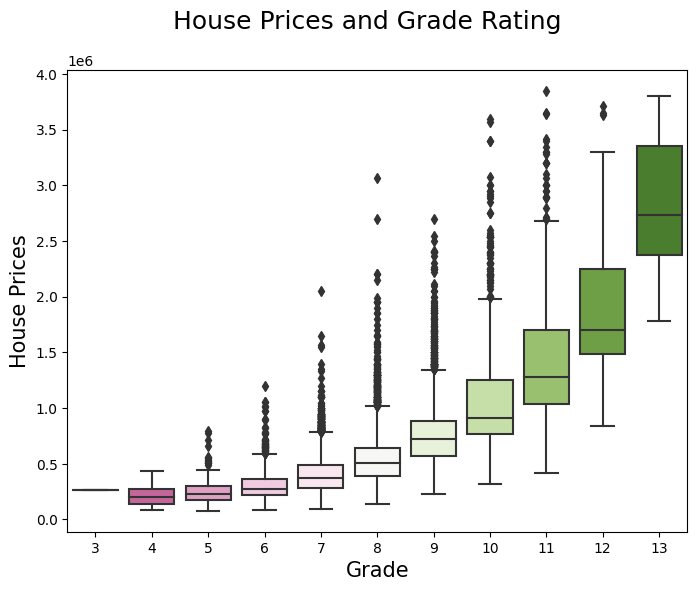

In [179]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['grade'], y=df['price'], palette="PiYG")
plt.suptitle('House Prices and Grade Rating', size=18)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('House Prices', fontsize = 15)

plt.show()

Description of Grade Rating:

**"An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design."**

- Many outliers in the data.
- Appears to be a quadratic relationship between Grade and Price. 
- Significant increase in the price range as the grade increases.

In [180]:
df.grade.value_counts()

grade
7     8968
8     6063
9     2614
6     2037
10    1131
11     390
5      241
12      73
4       27
13       8
3        1
Name: count, dtype: int64

In [181]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650
1,6414100192,20141209,538000,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639
2,5631500400,20150225,180000,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062
3,2487200875,20141209,604000,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000
4,1954400510,20150218,510000,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503


### Price difference between the most/least expensive homes

How does the zipcode impact the price of a home?

In [182]:
# Create a dataframe for the top 5/bottom 5 zipcodes in terms of average price. Then, combine the dataframes. 

pd.options.display.float_format = "{:.2f}".format # Round to 2 decimal places

top = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[:5]
bot = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[-5:]
combined = pd.concat([top, bot])
combined.sort_values('price', ascending=True, inplace=True)

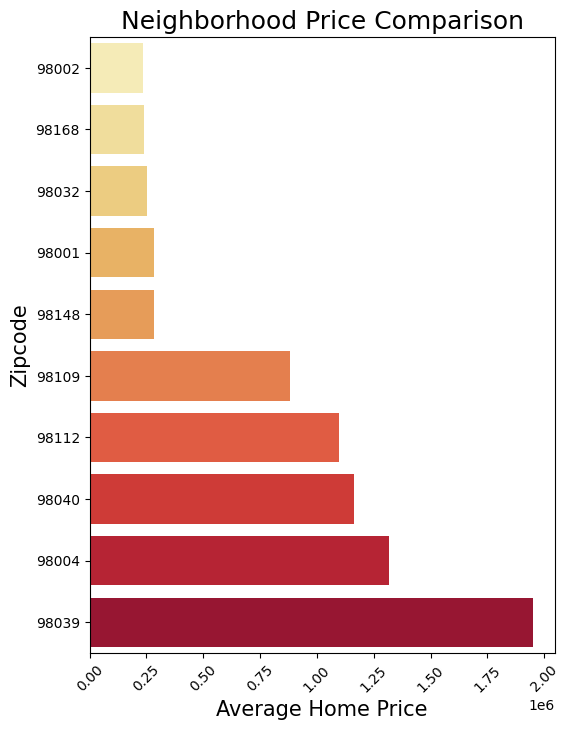

In [183]:
plt.figure(figsize=(6,8))

sns.barplot(x='price', y='zipcode' , order = combined['zipcode'], orient='h', data=combined, palette='YlOrRd')

plt.title('Neighborhood Price Comparison', size=18)
plt.ylabel('Zipcode', size=15)
plt.xlabel('Average Home Price', size=15)
plt.xticks(rotation=45)

plt.show()

- There is a large price gap between the bottom/top 5 neighbourhoods. 
- Average price of a house in the bottom 5 is less than 250,000 whereas the top 5 seem to start at almost 1,000,000.
- Let's map this to see the difference in location.

### Top 5/Bottom 5 Zipcode Price Comparison

In [184]:
# Convert zipcode to string type because the Folium Choropleth "columns" parameter only accepts strings

combined['zipcode'] = combined['zipcode'].astype(str)

In [185]:
# Create a map with folium using the combined variable from above

my_map = folium.Map(width=500, height=400,location=[47.45,-122.22], zoom_start=9.3)

folium.Choropleth(
    geo_data="/kaggle/input/wa-json-file/wa_washington_zip_codes_geo.min.json",
    data=combined,
    columns=['zipcode', 'price'], 
    key_on='feature.properties.ZCTA5CE10', 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    nan_fill_color='clear', 
    nan_fill_opacity=0.1,
    legend_name='HOUSE PRICE'
).add_to(my_map)

folium.LayerControl().add_to(my_map)

my_map

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/wa-json-file/wa_washington_zip_codes_geo.min.json'

- Expensive neighborhoods are clustered together.
- The most expensive neighborhood is located in close proximity to Lake Washington. How many waterfront homes from the dataset are located here?

In [186]:
# 157 waterfront homes in the dataset

df.waterfront.value_counts()

waterfront
0    21396
1      157
Name: count, dtype: int64

In [187]:
# Only 1 waterfront property is located in the most expensive zipcode. I assumed that there would be a lot more. 

df[(df['zipcode'] == 98039) & (df['waterfront'] == 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15255,2425049063,20140911,3640900,4,3.25,4830,22257,2.00,1,4,4,11,4830,0,1990,0,98039,47.64,-122.24,3820,25582


In [188]:
top_5_zipcodes = (98039, 98004, 98040, 98112, 98109)

In [189]:
# How many waterfront homes are located in the top 5 zip codes? 

print(top)
print('')
df[(df['zipcode'].isin(top_5_zipcodes)) & (df['waterfront'] == 1)]

    zipcode      price
24    98039 1948411.28
3     98004 1315589.09
25    98040 1164533.57
48    98112 1095499.34
47    98109  879623.62



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2075,3623500260,20140512,1200000,3,1.75,1560,8078,1.50,1,4,4,6,1560,0,1928,0,98040,47.58,-122.25,2890,16710
2085,8106100105,20141114,3850000,4,4.25,5770,21300,2.00,1,4,4,11,5770,0,1980,0,98040,47.59,-122.22,4620,22748
4635,1324049015,20141111,2485000,4,2.50,3440,23954,1.50,1,3,5,10,2260,1180,1931,0,98040,47.56,-122.23,4230,18723
6771,5442300807,20140624,2700000,5,2.75,3831,13800,2.00,1,4,3,9,3831,0,1959,1980,98040,47.59,-122.25,3850,36563
7313,4131900066,20140825,3100000,3,3.00,3920,13085,2.00,1,4,4,11,3920,0,1996,0,98040,47.57,-122.20,3450,13287
7886,3024059014,20150325,1900000,4,2.25,3020,11489,1.50,1,3,5,10,2110,910,1916,1988,98040,47.54,-122.21,3890,11489
7989,9362000040,20140623,3400000,3,4.50,5230,17826,2.00,1,4,3,10,3740,1490,2005,0,98040,47.53,-122.24,3670,17826
9175,3124059023,20150213,1955000,3,1.75,3330,12566,1.00,1,4,4,8,1940,1390,1960,0,98040,47.53,-122.22,3730,16560
14822,3623500408,20150330,2600000,3,3.00,3410,16015,2.00,1,4,4,10,2220,1190,1973,0,98040,47.57,-122.24,3760,16572
15255,2425049063,20140911,3640900,4,3.25,4830,22257,2.00,1,4,4,11,4830,0,1990,0,98039,47.64,-122.24,3820,25582


- Only 11 out of the 157 waterfront homes in the dataset are located in the top 5 expensive zipcodes. 
- My assumption was that there would be a lot more waterfront homes in the 5 most expensive neighborhoods. 

### General Zipcode Price Comparison

In [190]:
# Let's visualize the price distirubtion for all zipcodes on a map. 

zipcode_prices = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)
zipcode_prices['zipcode'] = zipcode_prices['zipcode'].astype(str)
zipcode_prices

,zipcode,price
24,98039,1948411.28
3,98004,1315589.09
25,98040,1164533.57
48,98112,1095499.34
47,98109,879623.62
...,...,...
61,98148,284908.60
0,98001,281194.87
20,98032,251296.24
64,98168,240328.37


In [191]:
# Create a map with folium using data from the zipcode_prices variable created above.

my_map1 = folium.Map(width=500, height=400,location=[47.40,-122.02], zoom_start=8.4)

folium.Choropleth(
    geo_data="/kaggle/input/wa-json-file/wa_washington_zip_codes_geo.min.json",
    data=zipcode_prices,
    columns=['zipcode', 'price'], 
    key_on='feature.properties.ZCTA5CE10', 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.4,
    nan_fill_color='clear', 
    nan_fill_opacity=0.2,
    legend_name='HOUSE PRICE'
).add_to(my_map1)

folium.LayerControl().add_to(my_map1)

my_map1

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/wa-json-file/wa_washington_zip_codes_geo.min.json'

### House Price and Size Comparison

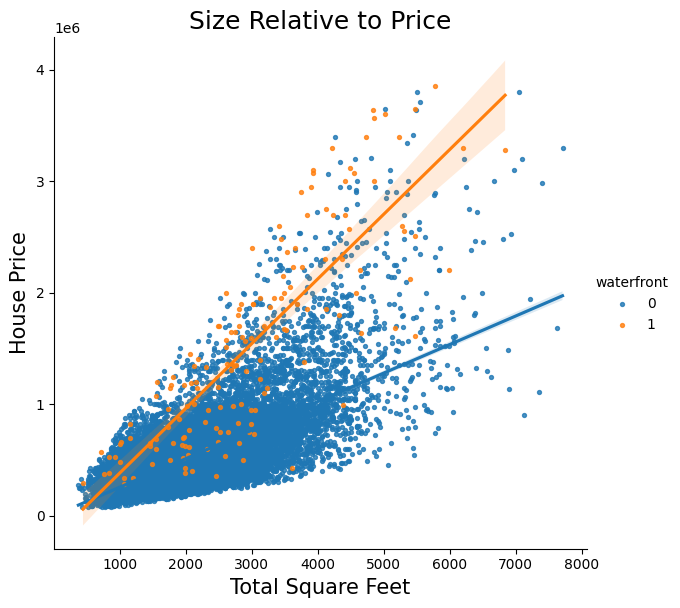

In [192]:
sns.lmplot(x='sqft_living', y='price', data=df, scatter_kws={'s':8}, hue='waterfront', height=6)

plt.title('Size Relative to Price', size=18)
plt.ylabel('House Price', size=15)
plt.xlabel('Total Square Feet', size=15)


plt.show()

- The baseline price for waterfront properties is higher on average than those without a waterfront.
- As the house size increases, the price gap significantly widens between waterfront/non waterfront houses.

### Year Built and Price

- Does the year built notably impact the price? Are newer homes more expensive? 

In [193]:
# 116 different years within the dataset

df.yr_built.nunique()

116

In [194]:
# 0 null values

df.yr_built.isnull().sum()

0

In [195]:
# Check the oldest/newest year built

print(df.yr_built.min())
print(df.yr_built.max())

1900
2015


C:\Users\Yahya Darwish\AppData\Local\Temp\ipykernel_16836\4121882902.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='yr_built', y='price', data=df,linewidth=1.5, color='blueviolet', ci=None)


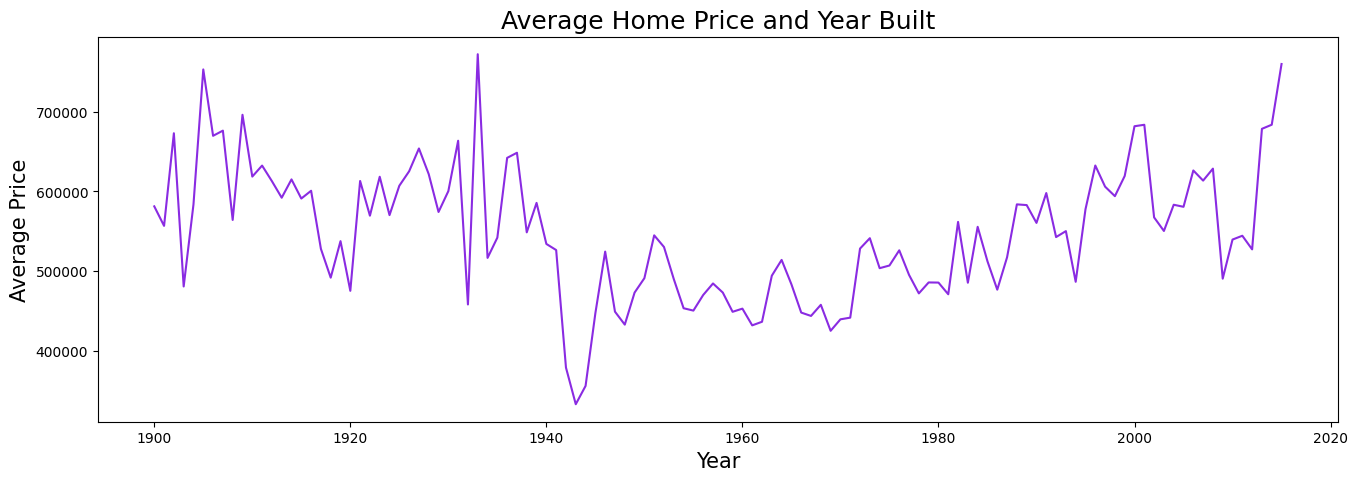

In [196]:
plt.figure(figsize=(16,5))

sns.lineplot(x='yr_built', y='price', data=df,linewidth=1.5, color='blueviolet', ci=None)

plt.title('Average Home Price and Year Built', size=18)
plt.ylabel('Average Price', size=15)
plt.xlabel('Year', size=15)

plt.show()

- Houses built before 1940 and after 2000 have a higher average price.
- Houses approximately between 1945 - 1980 cost less on average.
- Is this possibly due to most very old houses (before 1940) having been renovated?

### Correlation Between Variables

In [197]:
# let's graph the below

df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.01,-0.02,0.00,0.01,-0.01,-0.15,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.00,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
date,0.01,1.00,0.00,-0.01,-0.03,-0.03,-0.00,-0.02,-0.00,0.00,-0.05,-0.03,-0.03,-0.01,0.00,-0.02,0.00,-0.03,-0.00,-0.02,-0.01
price,-0.02,0.00,1.00,0.32,0.52,0.69,0.09,0.26,0.25,0.40,0.04,0.67,0.59,0.31,0.05,0.12,-0.05,0.32,0.02,0.60,0.07
bedrooms,0.00,-0.01,0.32,1.00,0.53,0.60,0.04,0.18,-0.01,0.08,0.02,0.36,0.49,0.30,0.16,0.02,-0.16,-0.01,0.14,0.40,0.03
bathrooms,0.01,-0.03,0.52,0.53,1.00,0.75,0.09,0.51,0.05,0.18,-0.13,0.66,0.68,0.27,0.51,0.05,-0.21,0.02,0.23,0.57,0.08
sqft_living,-0.01,-0.03,0.69,0.60,0.75,1.00,0.18,0.36,0.09,0.27,-0.06,0.76,0.87,0.42,0.32,0.05,-0.20,0.05,0.25,0.76,0.18
sqft_lot,-0.15,-0.00,0.09,0.04,0.09,0.18,1.00,-0.01,0.03,0.07,-0.01,0.12,0.19,0.02,0.06,0.01,-0.14,-0.10,0.25,0.17,0.77
floors,0.02,-0.02,0.26,0.18,0.51,0.36,-0.01,1.00,0.02,0.03,-0.26,0.46,0.53,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.02
waterfront,-0.00,-0.00,0.25,-0.01,0.05,0.09,0.03,0.02,1.00,0.40,0.02,0.07,0.06,0.07,-0.03,0.09,0.03,-0.02,-0.04,0.08,0.03
view,0.01,0.00,0.40,0.08,0.18,0.27,0.07,0.03,0.40,1.00,0.05,0.24,0.16,0.27,-0.06,0.10,0.09,0.01,-0.08,0.28,0.07


In [198]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [199]:
# Let's put price as the last column for an easier interpretation of the correlation heatmap below.

cols = ['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price',]

In [200]:
df = df[cols]

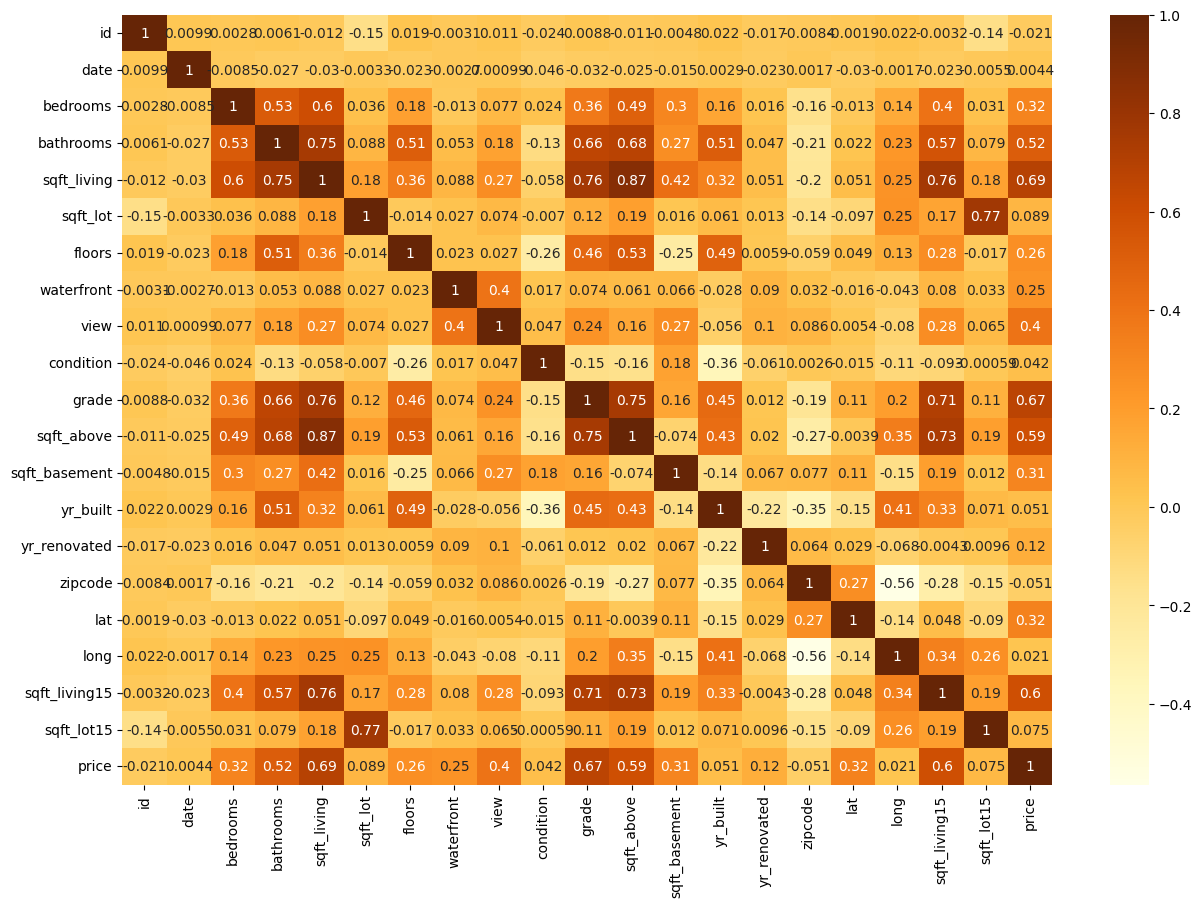

In [201]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlOrBr', annot=True)

plt.show()

- Sqft_living (total square feet of the house, not including the lot) and Grade have robust correlations to price, similar to what we saw on the graphs earlier.
- ID and zipcode have weak negative correalations.
- I was expecting a strong positive correlation between sqft_lot and yr_built with price. Though it seems that other variables have a stronger relationship to price. 

In [202]:
# Sort the highest/lowest correlated variables

high_corr = df.corr()['price'].sort_values(ascending=False)
high_corr

price            1.00
sqft_living      0.69
grade            0.67
sqft_living15    0.60
sqft_above       0.59
bathrooms        0.52
view             0.40
lat              0.32
bedrooms         0.32
sqft_basement    0.31
floors           0.26
waterfront       0.25
yr_renovated     0.12
sqft_lot         0.09
sqft_lot15       0.07
yr_built         0.05
condition        0.04
long             0.02
date             0.00
id              -0.02
zipcode         -0.05
Name: price, dtype: float64

# **Model Building** <a id="4"></a>

The following models will be compared:
- Random Forest Regression Model
- XGBoost Regression Model

In [203]:
# Drop the price column and variables with low correlations

pd.options.display.float_format = "{:.4f}".format # Lets show the results with 4 decimal places

dropped_vars = ['price','id', 'date','long']

X = df.drop(dropped_vars, axis='columns')
y = df['price']

In [204]:
# Split up the training/testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### RANDOM FOREST REGRESSOR MODEL


In [205]:
model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(X_train, y_train)
pk.dump(model_RFR, open("model_RFR.pkl", "wb"))

RandomForestRegressor()

In [206]:
yhat_pred_RFR = model_RFR.predict(X_test)

In [207]:
cross_val_RFR = round(np.mean(cross_val_score(model_RFR,X_train,y_train)),4)
R2_RFR = round(r2_score(y_test, yhat_pred_RFR),4)
MAE_RFR = int(mean_absolute_error(y_test,yhat_pred_RFR))

### XGBOOST REGRESSOR MODEL

In [208]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)
pk.dump(model_xgboost, open("model_xgboost.pkl", "wb"))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [209]:
yhat_pred_xgboost = model_xgboost.predict(X_test)

In [210]:
cross_val_xgboost = round(np.mean(cross_val_score(model_xgboost,X_train,y_train)),4)
R2_xgboost = round(r2_score(y_test, yhat_pred_xgboost),4)
MAE_xgboost = int(mean_absolute_error(y_test,yhat_pred_xgboost))

In [212]:
models = pd.DataFrame({
    'Model': [  'Random Forest Regression', 'XGBOOST Regression' ],
    'Mean Absolute Error': [ MAE_RFR, MAE_xgboost,
              ],
    'R2 Score': [ R2_RFR, R2_xgboost],
    'Cross Validation Score': [ cross_val_RFR, cross_val_xgboost]})

models.sort_values(by='Cross Validation Score', ascending=False)

,Model,Mean Absolute Error,R2 Score,Cross Validation Score
1,XGBOOST Regression,69028,0.8912,0.8688
0,Random Forest Regression,72499,0.8689,0.8557
